# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [109]:
import pandas as pd

df = pd.read_csv('C:\\Users\\Stuart\\Documents\\GitHub\\Springboard\\EDA\\EDA_human_temperature\\data\\human_body_temperature.csv')

#### Let's generate some quick descriptive statistics


In [110]:
print(df.describe(include='all'), '\n\n\n')

print(df.isnull().sum())

        temperature gender  heart_rate
count    130.000000    130  130.000000
unique          NaN      2         NaN
top             NaN      F         NaN
freq            NaN     65         NaN
mean      98.249231    NaN   73.761538
std        0.733183    NaN    7.062077
min       96.300000    NaN   57.000000
25%       97.800000    NaN   69.000000
50%       98.300000    NaN   74.000000
75%       98.700000    NaN   79.000000
max      100.800000    NaN   89.000000 



temperature    0
gender         0
heart_rate     0
dtype: int64


It looks like the dataframe has 130 observations, each with a temperature, gender, and heart rate value. 
There do not appear to be any missing values, as the sum of null values is 0 for each field.

### Visually checking for normality

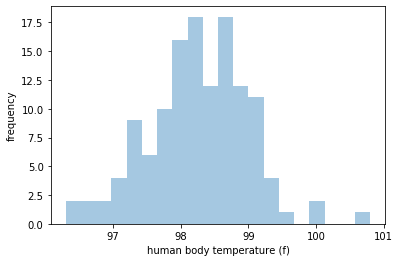

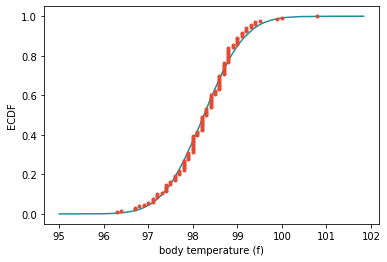

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

#histogram of temperature values for initial inspection
sns.set_color_codes('dark')
_ = sns.distplot(df['temperature'], bins=20, kde=False)
_ = plt.xlabel('human body temperature (f)')
_ = plt.ylabel('frequency')
_ = plt.show()

#plot cumulative distribution function (CDF) for a normal distribution with mu and sigma from temperatures and measured temperatures
import numpy as np
mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])

#sample a normal distribution using the mean and standard deviation sourced from temperature measurements
samples = np.random.normal(mu, sigma, 50000)


#define a function to create the CDF from a series
def ecdf(data):
    """Compute the ECDF for a one-dimensional array of measurements."""
    #store length, n
    n = len(data)

    #sort the data and store, x
    x = np.sort(data)

    #probability the value of the distribution falls at or under that x value
    y = np.arange(1, n + 1) / n

    return x, y


#create theoretical x and y arrays based on the sampled data from a normal distribution
x_theor, y_theor = ecdf(samples)

#create empirical x and y arrays based on temperatures
x, y = ecdf(df['temperature'])

#plot both emipircal and theoretical and visually compare
_ = plt.plot(x_theor, y_theor, color=(28 / 256, 144 / 256, 153 / 256))
_ = plt.plot(x,
             y,
             marker='.',
             linestyle='none',
             color=(227 / 256, 74 / 256, 51 / 256))
_ = plt.xlabel('body temperature (f)')
_ = plt.ylabel('ECDF')

##### The ECDF visually suggests the distribution of body temperatures is normal
##### However, we can test this interpretation
    I chose scipy.stats.normaltest, as there is no need to re-invent the wheel here.
    If the p value is less than the alpha value (I chose alpha at 0.05, a common standard), the null hypothesis that the
    sample comes from a normal distribution cannot be rejected.


In [112]:
#testing for normality using normaltest from scipy.stats
from scipy import stats
print('\nNormal test for the temperature data:\n',
      stats.normaltest(df['temperature']), '\n')

#set alpha value for test
alpha = 0.05

#generate test statistica and probability value
k2, p = stats.normaltest(df['temperature'])

if p < alpha:  #H0: temperature comes from a normal distribution
    print('The null hypothesis can be rejected')
else:
    print('The null hypothesis cannot be rejected. i.e. This can be considered normally distributed')


Normal test for the temperature data:
 NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254) 

The null hypothesis cannot be rejected. i.e. This can be considered normally distributed


### Is the central limit theorem appropriate here?

randomization: given that we did not collect this data, we will assume the selection process for subjects was random.
The gender balance is  even so that supports this idea.

10% rule: The population is all humans, so 130 observations is certainly less than 10% of that number

large enough sample size? The general rule is that n>=30 here. It can be slightly lower with some conditions met in the sample but at n=130 here, I believe the temperature sampling is large enough

independent samples: It seems so. While it is not explicitly stated each sample was taken from a different person, it seems intutive to assume that for now.
    

####  98.6? Really?
#### Let's test if 98.6 f is the true population mean based on this data

In [113]:
#Bootstrap approach

#create a function to draw bootstrap replicates
def boostrap_replicate(data, func):
    "Draw boostrap replicate from one dimensional array"
    return func(np.random.choice(data, size=len(data)))

#draw 10000, size, bootstrap samples and test the mean value
size = 10000
replicates = np.empty(size)
for i in range(size):
    replicates[i] = boostrap_replicate(df['temperature'], np.mean)
    
# generate probability that the mean body temp is greater than or equal to 98.6
p = np.sum((replicates >= 98.6))/ len(replicates)


print('Probability the population mean is actually >= 98.6 given this sample: ', p, '%')

Probability the population mean is actually >= 98.6 given this sample:  0.0 %


In [114]:
#frequentist testing

# we'll use t tests, as the population temperature standard deviation is not known

#set known mean, m
m = 98.6

#set alpha value for testing
alpha = 0.05

#one sample t test
t_test_results = stats.ttest_1samp(df['temperature'], m)

if (t_test_results[0] < 0) & (t_test_results[1]/2 < alpha):
    print("t-test: reject null hypothesis, mean is less than {}".format(m),'\n')
else:
    print("t-test: accept null hypothesis\n")
    
print('t-test: test statistic: ', t_test_results[0],'\n', 'two-tailed p value : ', t_test_results[1], '\n\n')

#z test because instructions ask for that as well
from statsmodels.stats import weightstats as stests


z_test_results, p = stests.ztest(df['temperature'], value=98.6, alternative='two-sided')

if p<alpha:
    print("z-test: reject null hypothesis, sample mean is less than {}".format(m))
else:
    print("z-test: accept null hypothesis, sample mean is not significantly different from {}".format(m))
print('z-test: test statistic: ', z_test_results,'\n', 'two-tailed p value : ', p, '\n\n')

t-test: reject null hypothesis, mean is less than 98.6 

t-test: test statistic:  -5.4548232923645195 
 two-tailed p value :  2.4106320415561276e-07 


z-test: reject null hypothesis, sample mean is less than 98.6
z-test: test statistic:  -5.4548232923645195 
 two-tailed p value :  4.9021570141012155e-08 




It is clear that the sample mean is significantly lower than the population mean, as both t and z tests show negative directions in the test statistics and very low p values. Z tests are more appropriate with large sample sizes and a known population mean and variance. However, for testing, if the sample size is large enough then the sample variance can be assumed to be equal to the population variance. The sample size of this dataset is 130, so thats at 4x the recommended "large" sample size of 30 and likely why the results of the two tests do not differ in great ways.

What if we draw a smaller sample out of the original temperatures?

In [115]:
#drawing a smaller sample, n=10 out of all temperatures and testing on that.
few_temps = np.random.choice(df['temperature'], 10)

#set known mean, m
m = 98.6

#set alpha value for testing
alpha = 0.05

#one sample t test
t_test_results = stats.ttest_1samp(few_temps, m)

if (t_test_results[0] < 0) & (t_test_results[1]/2 < alpha):
    print("t-test: reject null hypothesis, mean is less than {}".format(m),'\n')
else:
    print("t-test: accept null hypothesis\n")
    
print('t-test: test statistic: ', t_test_results[0],'\n', 'two-tailed p value : ', t_test_results[1], '\n\n')


#z test because instructions ask for that
from statsmodels.stats import weightstats as stests

z_test_results, p = stests.ztest(few_temps, value=98.6, alternative='two-sided')

if p<alpha:
    print("z-test: reject null hypothesis, mean is less than {}".format(m))
else:
    print("z-test: accept null hypothesis, mean is not significantly different from {}".format(m))
print('z-test: test statistic: ', z_test_results,'\n', 'two-tailed p value : ', p, '\n\n')

t-test: reject null hypothesis, mean is less than 98.6 

t-test: test statistic:  -2.9024458541066696 
 two-tailed p value :  0.017525443167050056 


z-test: reject null hypothesis, mean is less than 98.6
z-test: test statistic:  -2.90244585410667 
 two-tailed p value :  0.0037026116010279186 




With a randomly selected smaller sampling of 10 points, the negative test statistic still shows the sample mean lower than the 98.6 value, but not as strongly. Similarly, the p values meet significance thresholds about half the time(note that random state is not set so results may or may not meet significance at alpha=0.05).

#### Outlier Detection: What should we consider normal temperatures?


At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [116]:
#boostrap approach

def confidence_bootstrap_replicates(data, size=1, intervals=[2.5, 97.5]):
    """generate a boostrapped replicate and determine lower and upper confidence intervals in separate lists"""
    lower_ci = []
    upper_ci = []
    for i in range(size):
        a = np.random.choice(data, len(data))
        lower, upper = np.percentile(a, intervals)
        lower_ci.append(lower)
        upper_ci.append(upper)
    return lower_ci, upper_ci



In [117]:
#identify lower and upper confidence intervals
lower, upper = confidence_bootstrap_replicates(df['temperature'], size=10000, intervals=[0.5,99.5])

#identify values falling outside the bootstrapped mean confidence interval values at 95% confidence
print('with 99% confidence, the population mean temperature should be \nabove: ',
      np.mean(lower), '\nbelow: ', np.mean(upper), '\n\n')
print(
    'Records outside this interval: \n',
    df[(df.temperature < np.mean(lower)) |
       (df.temperature > np.mean(upper))].sort_values('temperature'))

with 99% confidence, the population mean temperature should be 
above:  96.46261414999998 
below:  100.21804335 


Records outside this interval: 
      temperature gender  heart_rate
125         96.3      M        70.0
39          96.4      F        69.0
116        100.8      F        77.0


In [118]:
#frequentist approach to outliers

#set thresholds at +-2.5*sigma
upper_threshold = 2.5 * sigma + mu
lower_threshold = -2.5 * sigma + mu

print('at 2.5*sigma, the population mean temperature should be \nabove: ',
      lower_threshold, '\nbelow: ', upper_threshold, '\n\n')

#find records where temperature is outside 2.5 standard deviations
print(df[(df.temperature > upper_threshold) |
         (df.temperature < lower_threshold)].sort_values('temperature'))

at 2.5*sigma, the population mean temperature should be 
above:  96.42333632196818 
below:  100.07512521649338 


     temperature gender  heart_rate
125         96.3      M        70.0
39          96.4      F        69.0
116        100.8      F        77.0


#### Differences based on sex

Does temperature vary between sex classes? Let's find out

t-test: reject null hypothesis, Male Temperature mean is significantly different than Female Temperature Mean

t-test: test statistic:  -2.2854345381656103 
 two-tailed p value :  0.02393188312239561 




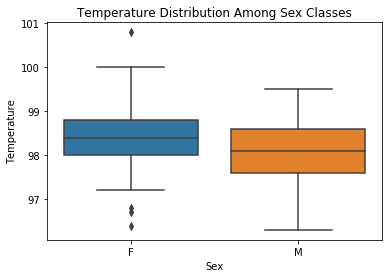

In [119]:
#separate temperatures based on sex
m_temps = np.array(df['temperature'][df['gender'] == 'M'])
f_temps = np.array(df['temperature'][df['gender'] == 'F'])

#plot temperatures
sns.boxplot(x='gender', y='temperature', data=df)
plt.xlabel('Sex')
plt.ylabel('Temperature')
plt.title('Temperature Distribution Among Sex Classes')

#use independent samples t test to test for means across two groups
t_test_results = stats.ttest_ind(m_temps, f_temps, equal_var=True)

#set threshold for alpha
alpha = 0.05

if (t_test_results[0] < 0) & (t_test_results[1]/2 < alpha):
    print('t-test: reject null hypothesis, Male Temperature mean is significantly different than Female Temperature Mean\n')
else:
    print("t-test: accept null hypothesis: Means do not differ significantly between sex classes\n")
    
print('t-test: test statistic: ', t_test_results[0],'\n', 'two-tailed p value : ', t_test_results[1], '\n\n')

Male temperatures are significantly lower than female temperatures based on this data. I used a two-tailed independent samples t test because it calculates the likelihood that the mean among two groups is equal. The negative direction in the test statistic shows that the Male mean is lower than the Female mean. This is corroborated by the boxplot of temperature among the sex classes.

Given the entirety of this exploratory analysis, the population mean that everyone knows by heart (98.6) does fall in the 99% confidence interval given this sample. I would not refute that as a possible value for the population mean. However, If this sample is randomly collected from individuals across the globe, it is a compelling case to propose an alternative value that is lower than 98.6. Confidence intervals would shrink given additional sampling which seems easy enough to source from medical care at a broader scale.